# Exercise 2

## Unsupervised Learning

---

## Overview

Welcome to this excercise. We are now going to use our new skills to build our first unsupervised learning models. In particular, we are going to use multiple methods to create a number unsupervisoed learning models such kmeans for clustering and PCA to reduce the dimensionality of or data.




In [2]:
import sys
import os
# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))# Add the path to sys.path

# Add the path to sys.path
sys.path.append(func_lib_path)

# Now you can import func_lib
import func_lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Generate historical price data using the 'createHistPrices' function from 'func_lib'.
# Assign the result to the variable 'historical_prices'.
historical_prices = func_lib.create_hist_prices()

# Define a list of momentum periods to be used in the computation.
# Include periods such as 1, 2, 3, 29, 30, 31, 59, 60, and 61.
list_of_momentums = [1, 2, 3, 29, 30, 31, 59, 60, 61]

# Compute the returns using the 'computingReturns' function from 'func_lib'.
# Pass 'historical_prices' and 'list_of_momentums' as arguments.
# Assign the result to the variable 'total_returns'.
total_returns = func_lib.compute_returns(historical_prices, list_of_momentums)

# Drop the 'F_1_d_returns' column from the 'total_returns' DataFrame.
# Use the 'drop()' method with 'columns' parameter and set 'inplace=True' to modify the DataFrame in place.
total_returns.drop(columns={'F_1_d_returns'}, inplace=True)

# Remove any rows with missing values from the 'total_returns' DataFrame.
# Use the 'dropna()' method with 'inplace=True' to modify the DataFrame in place.
total_returns.dropna(inplace=True)

Loading historical prices from historical_prices.pkl


In [4]:
# Standardize the features in the 'total_returns' DataFrame.
# - Create a StandardScaler object.
# - Use the 'fit_transform()' method of the scaler to standardize the features in 'total_returns'.
# - Assign the standardized data to the variable 'X_scaled'.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(total_returns)


In [5]:
# Initialize PCA (Principal Component Analysis).
# - Create a PCA object to perform dimensionality reduction.

pca = PCA()

# Fit PCA to the standardized data.
# - Use the 'fit()' method of the PCA object to compute the principal components based on 'X_scaled'.

pca.fit(X_scaled)

# Transform the data to principal components.
# - Use the 'transform()' method of the PCA object to project 'X_scaled' into the principal component space.
# - Assign the transformed data to the variable 'X_pca'.

X_pca = pca.transform(X_scaled)


In [6]:
# Compute the explained variance ratio for each principal component.
# - Use the 'explained_variance_ratio_' attribute of the PCA object to get the proportion of variance explained by each component.
# - Assign the result to the variable 'explained_variance_ratio'.

explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance.
# - Use 'np.cumsum()' to compute the cumulative sum of the explained variance ratios.
# - Assign the result to the variable 'cumulative_explained_variance'.

cumulative_explained_variance = np.cumsum(explained_variance_ratio)

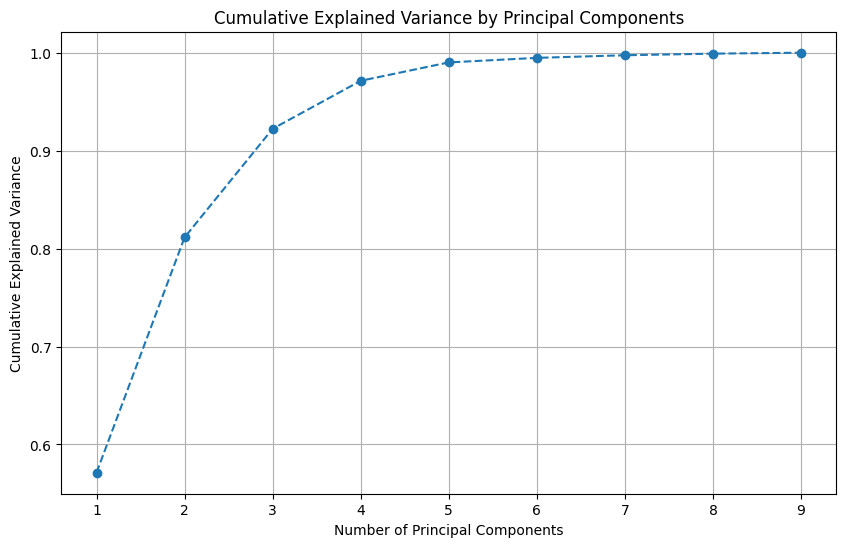

In [7]:
# Plot the cumulative explained variance.
# - Create a new figure with a specified size for the plot.
# - Plot 'cumulative_explained_variance' against the number of principal components.
# - Use markers and a dashed line style for better visualization.
# - Add x-axis and y-axis labels, a title, and a grid to the plot.
# - Display the plot using 'plt.show()'.

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [8]:
# Select the number of principal components that explain at least 90% of the variance.
# - Use 'np.argmax()' to find the index of the first cumulative explained variance value that is greater than or equal to 0.90.
# - Add 1 to the index because 'np.argmax()' returns a zero-based index.
# - Assign the result to 'n_components' and print the value to display the number of components needed.

n_components = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(n_components)


3


In [9]:
# Apply PCA with the selected number of components.
# - Create a PCA object with 'n_components' set to the number of components that explain at least 90% of the variance.
# - Fit the PCA object to the standardized data and transform it into the principal component space.
# - Assign the transformed data to 'X_pca'.

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


In [10]:
# Define the feature names.
# - Extract the column names from the 'total_returns' DataFrame to use as feature names.
# - Assign these column names to the variable 'features'.

features = total_returns.columns

# Get the loadings of the principal components.
# - Use the 'components_' attribute of the PCA object to get the principal component loadings.
# - Assign the result to the variable 'loadings'.
loadings = pca.components_

# Create a DataFrame of the loadings.
# - Transpose the 'loadings' array using '.T' to match the features with the principal components.
# - Use 'pd.DataFrame()' to create the DataFrame, setting the index to 'features' and the columns to principal component names.
# - Assign the DataFrame to 'loadings_df'.

loadings_df = pd.DataFrame(loadings.T, index=features, columns=[f'PC{i+1}' for i in range(n_components)])

# Display the loadings DataFrame.
# - Use 'print()' to output the DataFrame to the console.

print(loadings_df)


                   PC1       PC2       PC3
1_d_returns   0.133583  0.529925 -0.125689
2_d_returns   0.171245  0.579512 -0.087466
3_d_returns   0.188656  0.530630 -0.034681
29_d_returns  0.391779 -0.048905  0.426879
30_d_returns  0.395898 -0.056260  0.420979
31_d_returns  0.396719 -0.063184  0.397909
59_d_returns  0.388686 -0.174543 -0.379696
60_d_returns  0.387723 -0.175921 -0.393666
61_d_returns  0.384995 -0.175543 -0.398029
